In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

plt.rcParams['font.sans-serif'] = ['SimHei']  ###防止无法显示中文并设置黑体
plt.rcParams['axes.unicode_minus'] = False  ###用来正常显示负号

In [3]:
filepath=glob.glob(r'D:\WORKcode\pythoncode\ncdata\typath\CMA_csv\*') 
sclonlist=[]
sclatlist=[]
for i in filepath:
    if int(i[-8:-4]) not in np.arange(2003,2020,1):
        continue
    print(i[-8:-4])
    df=pd.read_excel(i)
    # 去除重复的名字
    namelist=df['name_en'].drop_duplicates().reset_index()['name_en']
    # print(namelist)
    for name_i in namelist:
        if name_i=='(nameless)':
            print(name_i)
    #     temp=df[df["name_en"]==name_i].reset_index()
    #     sclonlist.append(temp['lon'][0])
    #     sclatlist.append(temp['lat'][0])

2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [3]:
# 转换成二维数组
scarray=np.zeros((50,65))
for i,j in zip(sclonlist,sclatlist):
    if i>170:
        continue
    lon_n=int(np.floor(i-105))
    lat_n=int(np.floor(j))
    scarray[lat_n,lon_n]+=1

Text(0.5, 1.0, '生成频率')

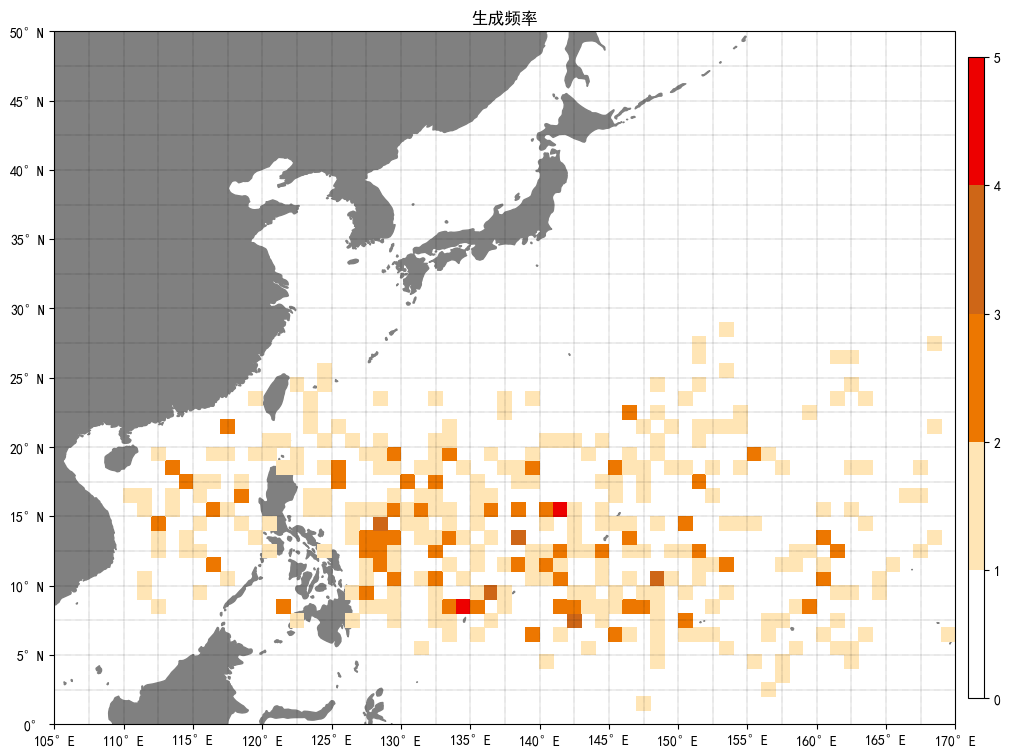

In [5]:
box1 = [105, 170, 0, 50]
xstep=5
ystep=5
fig=plt.figure(figsize=(16,9))
ax=fig.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree(central_longitude=120)})
ax.add_feature(cfeature.LAND.with_scale('50m'),facecolor='grey')
ax.set_extent(box1,ccrs.PlateCarree())
# 标注坐标轴
ax.set_xticks(np.arange(box1[0], box1[1] + 5, 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(box1[2], box1[3] + 5, 5), crs=ccrs.PlateCarree())
## 经纬度格式，把0经度设置不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.gridlines(xlocs=np.arange(box1[0], box1[1] + 2.5, 2.5), ylocs=np.arange(box1[2], box1[3] + 2.5, 2.5), linestyle=':', linewidth=0.3, x_inline=False, y_inline=False, color='k')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# # 绘图
from matplotlib.colors import ListedColormap,BoundaryNorm 
newcmap=ListedColormap(['white','#ffe5b5','#ed7700','#ce6617','#ed0000'],name='from_list')
# ax.pcolor(np.arange(105.5,170.5,1),np.arange(0.5,40.5,1),scarray,transform=ccrs.PlateCarree())
colorbar=ax.pcolor(np.arange(105.5,170.5,1),np.arange(0.5,50.5,1),np.where(scarray==0,np.nan,scarray),norm=BoundaryNorm(boundaries=[0,1,2,3,4,5],ncolors=5),cmap=newcmap,transform=ccrs.PlateCarree())
cb=plt.colorbar(colorbar,shrink=0.925,aspect=40,pad=0.01)
plt.title('生成频率')